<a href="https://colab.research.google.com/github/AparnaAnil9190/25_AUG_GIT_CDE_APAR/blob/main/New_ML_Model_Regression_using_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

In [ ]:
import os
os.environ["JAVA_HOME"]="/lib/jvm/java-11-openjdk-amd64"

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [ ]:
conf = SparkConf().set('spark.ui.port', '4050').setAppName("films").setMaster("local[2]")
sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)
#sc.stop()

/usr/local/lib/python3.12/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('Boston.csv')
data.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [ ]:
## Printing schema
data.cache()
data.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
## Descriptive analysis
data.toPandas()

,_c0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


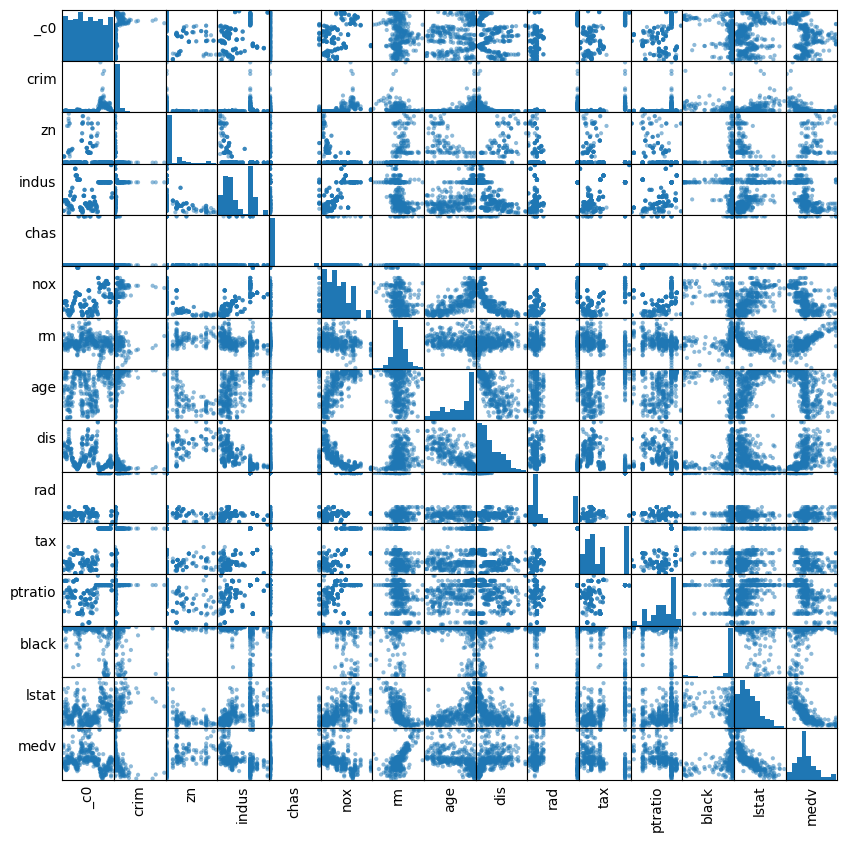

In [ ]:
import pandas as pd
from matplotlib import cm
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = data.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')
v_data = vectorAssembler.transform(data)
v_data = v_data.select(['features', 'medv'])
v_data.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [ ]:
import six
for i in data.columns:
    if not( isinstance(data.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to medv for ", i, data.stat.corr('medv',i))

Correlation to medv for  _c0 -0.22660364293533927
Correlation to medv for  crim -0.38830460858681154
Correlation to medv for  zn 0.3604453424505433
Correlation to medv for  indus -0.4837251600283728
Correlation to medv for  chas 0.1752601771902987
Correlation to medv for  nox -0.4273207723732821
Correlation to medv for  rm 0.6953599470715401
Correlation to medv for  age -0.3769545650045961
Correlation to medv for  dis 0.249928734085904
Correlation to medv for  rad -0.38162623063977735
Correlation to medv for  tax -0.46853593356776674
Correlation to medv for  ptratio -0.5077866855375622
Correlation to medv for  black 0.3334608196570661
Correlation to medv for  lstat -0.7376627261740145
Correlation to medv for  medv 1.0


In [ ]:
splits = v_data.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
#train_df,test_df=v_data.randomSplit([0.7,0.3])

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10)
lr_model = lr.fit(train_df)
#print("Coefficients: " + str(lr_model.coefficients))
#print("Intercept: " + str(lr_model.intercept))

In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 3.964936
r2: 0.791645


In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|29.319628880777156|24.0|[0.00632,18.0,2.3...|
| 32.48540836873618|32.2|[0.00906,90.0,2.9...|
| 30.32708761861852|32.7|[0.01301,35.0,1.5...|
| 44.39287104846068|50.0|[0.01501,90.0,1.2...|
|21.773281082475194|20.1|[0.01965,80.0,1.7...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.627889


In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|29.319628880777156|24.0|[0.00632,18.0,2.3...|
| 32.48540836873618|32.2|[0.00906,90.0,2.9...|
| 30.32708761861852|32.7|[0.01301,35.0,1.5...|
| 44.39287104846068|50.0|[0.01501,90.0,1.2...|
|21.773281082475194|20.1|[0.01965,80.0,1.7...|
| 21.98347702280229|16.5|[0.02498,0.0,1.89...|
|29.814127012792337|34.7|[0.02729,0.0,7.07...|
|24.427524898633763|21.6|[0.02731,0.0,7.07...|
| 22.74782886082433|26.6|[0.02899,40.0,1.2...|
|28.248692671063317|33.4|[0.03237,0.0,2.18...|
| 20.52035820780047|19.5|[0.03427,0.0,5.19...|
|41.925363561548636|48.5|[0.0351,95.0,2.68...|
|  30.3824581239051|23.5|[0.03584,80.0,3.3...|
|26.611787931233113|22.0|[0.03932,0.0,3.41...|
|21.146118361059738|21.1|[0.03961,0.0,5.19...|
|28.209732091180744|28.0|[0.04113,25.0,4.8...|
|28.339365461777746|22.9|[0.04203,28.0,15....|
|26.187152575573215|20.6|[0.04294,28.0,15....|
|27.613054622

## Decision tree regression

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.71606


In [ ]:
lr_evaluator.evaluate(dt_predictions)

0.8161798490455131

In [ ]:
dt_model.featureImportances

SparseVector(13, {0: 0.0313, 4: 0.0305, 5: 0.276, 6: 0.0004, 7: 0.0672, 9: 0.0062, 10: 0.0133, 11: 0.001, 12: 0.5741})

In [ ]:
data.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

## Gradient-boosted tree regression

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|43.840025123508696|50.0|[0.01381,80.0,0.4...|
|47.679089434629944|50.0|[0.01501,90.0,1.2...|
|22.569485121711796|23.1|[0.0187,85.0,4.15...|
|26.046448668842384|16.5|[0.02498,0.0,1.89...|
|24.143123345063337|25.0|[0.02875,28.0,15....|
+------------------+----+--------------------+
only showing top 5 rows



In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.50634
